# [CoE202] note 05b. Polynomial regression with validation (model capacity)

- Class Date : 21.04.01.
- Office Hour : -----------
- If you have any questions, ask via KLMS Q&A board or come to TA office hour to get our help.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load data file from Google drive
# from google.colab import drive
import scipy.io

# drive.mount("/content/drive")
# mat = scipy.io.loadmat('/content/drive/My Drive/01_LectureNotes/CoE202/Colab/data/data_polyfit_validation3.mat')
mat = scipy.io.loadmat('./data_polyfit_validation3.mat')

x = mat['x']
y = mat['y']

x = x[0:200]
y = y[0:200]

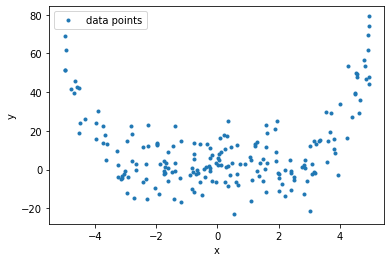

In [5]:
# plot data points
plt.plot(x, y, '.', label = 'data points')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')

Let's shuffle the data before we split.

In [6]:
# shuffle dataset
new_idx = np.random.permutation(200)
x_shuffle = x[new_idx]
y_shuffle = y[new_idx]

And let's split the data set.

In [7]:
## split dataset 
#x_train = x_shuffle[0:500] # training data set
#x_val = x_shuffle[500:750] # validation data set
#x_test = x_shuffle[750:1000] # test data set

#y_train = y_shuffle[0:500] # training data set
#y_val = y_shuffle[500:750]  # validation data set
#y_test = y_shuffle[750:1000] # test data set

# split dataset 
x_train = x_shuffle[0:100] # training data set
x_val = x_shuffle[100:150] # validation data set
x_test = x_shuffle[150:200] # test data set

y_train = y_shuffle[0:100] # training data set
y_val = y_shuffle[100:150]  # validation data set
y_test = y_shuffle[150:200] # test data set

In [8]:
def RMSE(y, ypred):
    rmse = np.sqrt(np.mean((y-ypred)**2))         
    
    return rmse

def poly_features(X, K):
    
    # X: inputs of size N x 1
    # K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    N = X.shape[0]
    
    # Compute the feature matrix in stages
    # HINT: np.vander to generate a Vandermonde matrix.
    Phi = np.vander(X, K+1, increasing=True)  

    return Phi

def vectorize_y(y)    :
    y_vec = y.reshape(-1, 1)  # 6 x 1 vector, N=6
    return y_vec      

With different K values in polynomial regression, let's observe how curve fits the data.

In [9]:
# polynomial fitting
K = 7

Phi_train = poly_features(x_train, K) # N x (K+1) feature matrix
yvec_train = vectorize_y(y_train)

Phi_val = poly_features(x_val, K) # N x (K+1) feature matrix
yvec_val = vectorize_y(y_val)

Phi_test = poly_features(x_test, K) # N x (K+1) feature matrix
yvec_test = vectorize_y(y_test)

Now let's perform gradient update while keeping track of the loss values.

In [10]:
N, D = Phi_train.shape

alpha = 0.000000001 # learning rate
num_iter = 1000 # number of iterations
theta = np.zeros((D, 1))
Ltrain_history = np.zeros((num_iter,))
Lval_history = np.zeros((num_iter,))

# iteratively apply gradient descent
for i in range(num_iter):
    # calculate loss
    Ltrain_history[i] =  RMSE(yvec_train, Phi_train @ theta )
    Lval_history[i] =  RMSE(yvec_val, Phi_val @ theta )

    # calculate gradients
    grad_L = 0.5* Phi_train.T@(Phi_train @ theta - yvec_train)/N

    # update theta
    theta = theta - alpha*grad_L

Let's check the final loss value.

In [11]:
print(Ltrain_history[-1])
print(Lval_history[-1])

9.584717989759717
11.010067407267758


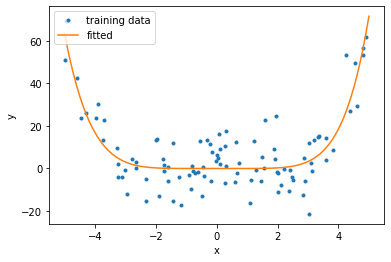

In [12]:
# construct the polynomial 
p = np.poly1d(np.flip(theta[:,0]))

# plot results
xp = np.linspace(-5, 5, 100) 
plt.plot(x_train, y_train,'.', label = 'training data')
plt.plot(xp, p(xp), label = 'fitted')     # plot fitted curve
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')

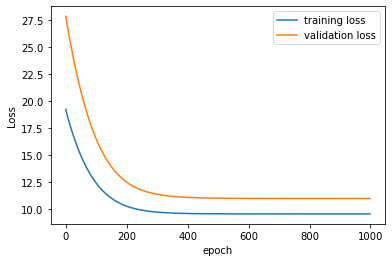

In [13]:
# plot the loss graph

plt.plot(Ltrain_history, label = 'training loss')
plt.plot(Lval_history, label = 'validation loss')
#plt.plot(xp, p(xp), label = 'fitted')     # plot fitted curve
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')

Let's check the test loss.

In [14]:
Ltest =  RMSE(yvec_test, Phi_test @ theta )


print(Ltest)

10.166954679726812
